## Homework 1 Clustering and Regression: Coding

### Clustering

K-means instruction:
1. **Initialization**: Pick K random data points as K centroid locations c1 ,
c2 , ..., cK .
2. **Assign**: For each data point k, find the closest centroid. Assign that
data point to the centroid. The distance used is typically Euclidean distance.
3. **Update**: For each centroid, calculate the mean from the data points
assigned to it.
4. **Repeat**: repeat step 2 and 3 until the centroids stop changing (conver-
gence).
Given the following data points in x-y coordinates (2 dimensional)

Import the library for implementation of K-means

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

Start by implementing the distance function for calculating the distance between two points namely Euclidean!

In [2]:
def euclidean_dist(x, y):
    return math.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

def dist_to_centroids(x, centroids):
    return [euclidean_dist(x, c) for c in centroids]

Then, I will implement the reusable function for K-means

In [3]:
def kmeans(data, centroids):
    
    # Print all starting centroids
    print('-' * 50)
    print("Initial centroids: ", centroids)
    print('-' * 50)
    
    i = 0
    cache_centroids = deepcopy(centroids)
    centroids = deepcopy(centroids)
    
    while True:
        
        i += 1
        print(f"Loop {i} starts", '-' * 50)
        # Create a dict for collecting each centroids's data point
        clusters = {p: [] for p in centroids}
        
        for d in data:
            distance_to_all_centroids = dist_to_centroids(d, centroids)
            closest_centroid = centroids[distance_to_all_centroids.index(min(distance_to_all_centroids))]
            print(f"Point {d} is closest to centroid {closest_centroid} with distance {min(distance_to_all_centroids):.3f}")
            clusters[closest_centroid].append(d)
        print()
        
        # Summarize all the cluster and calculate the new centroids by its data point mean
        for j, c in enumerate(clusters):
            print(f"Cluster {c} contains {len(clusters[c])} points: {clusters[c]}")
            
            data_in_cluster = clusters[c]
            x, y = np.mean(data_in_cluster, axis=0)
            
            # Assign to centroids and cache it for checking the convergence
            cache_centroids[j] = centroids[j]
            centroids[j] = (x, y)
        print()
        
        # Summarize new updated centroids
        for c in centroids:
            print(f"Updated centroid of loop {i} for {c}")
        
        if centroids == cache_centroids:
            print(f"The centroids are converged at loop {i} with {centroids}")
            break
        
        print()
    
    return clusters

**T5** If the starting points are (3,3), (2,2), and (-3,-3). Describe each assign and update step. What are the points assigned? What are the updated centroids? You may do this calculation by hand or write a program to do it.

In [4]:
data = [(1, 2),
        (3, 3),
        (2, 2),
        (8, 8),
        (6, 6),
        (7, 7),
        (-3, -3),
        (-2, -4),
        (-7, -7)]

centroids_T5 = [(3, 3), (2, 2), (-3, -3)]
clustered_T5 = kmeans(data, centroids_T5)

--------------------------------------------------
Initial centroids:  [(3, 3), (2, 2), (-3, -3)]
--------------------------------------------------
Loop 1 starts --------------------------------------------------
Point (1, 2) is closest to centroid (2, 2) with distance 1.000
Point (3, 3) is closest to centroid (3, 3) with distance 0.000
Point (2, 2) is closest to centroid (2, 2) with distance 0.000
Point (8, 8) is closest to centroid (3, 3) with distance 7.071
Point (6, 6) is closest to centroid (3, 3) with distance 4.243
Point (7, 7) is closest to centroid (3, 3) with distance 5.657
Point (-3, -3) is closest to centroid (-3, -3) with distance 0.000
Point (-2, -4) is closest to centroid (-3, -3) with distance 1.414
Point (-7, -7) is closest to centroid (-3, -3) with distance 5.657

Cluster (3, 3) contains 4 points: [(3, 3), (8, 8), (6, 6), (7, 7)]
Cluster (2, 2) contains 2 points: [(1, 2), (2, 2)]
Cluster (-3, -3) contains 3 points: [(-3, -3), (-2, -4), (-7, -7)]

Updated centroid of 

Make a function to plot the image for easier visualization

In [5]:
# Function to plot the clustered data
def plot_im(ori_data, ori_centroids, clustered_data):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    data = np.array(ori_data)
    centroid = np.array(ori_centroids)
    
    ax[0].scatter(x=data[:, 0], y=data[:, 1], c='red')
    ax[0].scatter(centroid[:, 0], centroid[:, 1], c='black', marker='x')
    ax[0].set_title('Data point w/ centroids (black)')
    
    colors = ['red', 'green', 'blue', 'yellow']
    for i, clus in enumerate(clustered_data):
        clus_points = np.array(clustered_data[clus])
        
        ax[1].scatter(x=clus_points[:, 0], y=clus_points[:, 1], c=colors[i])
        ax[2].scatter(x=clus_points[:, 0], y=clus_points[:, 1], c=colors[i])
    
    # name middle figure
    ax[1].set_title('Data points after clustering')
    
    # For last figure with new centroids
    
    # Make an array from clustered key
    clustered_centroids = np.array(list(clustered_data.keys()))
    ax[2].scatter(clustered_centroids[:, 0], clustered_centroids[:, 1], c='black', marker='x')
    ax[2].set_title('Data points w/ new centroids (black)')
    
    plt.show()

**T5's plot**: The plot (after switching starting points) of original data points in red color with their defined centroids in black color (left). After clustering, the K-means algorithm clearly distinguishes the data points into three groups (middle). The rightmost plot shows the updated centroids in black color.

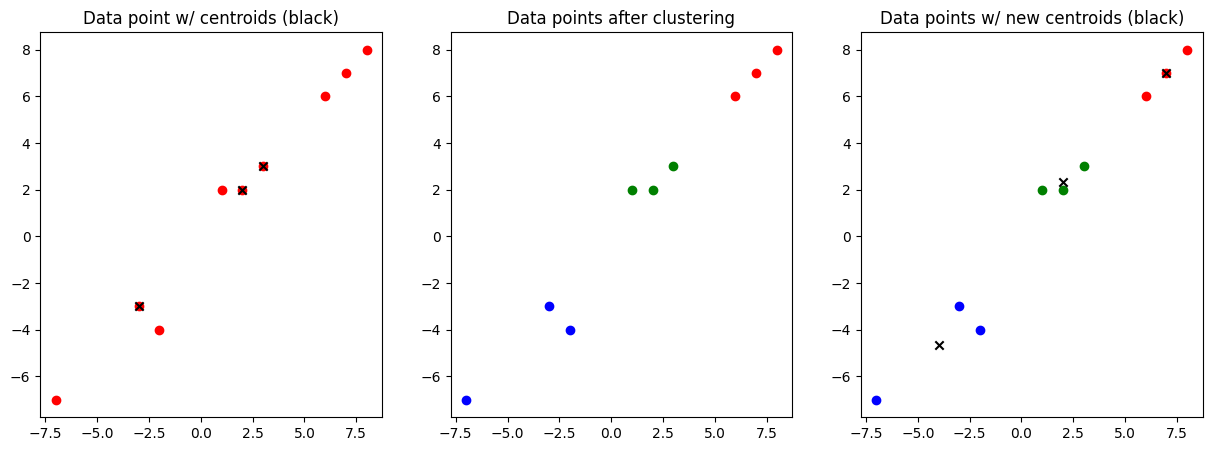

In [6]:
plot_im(data, centroids_T5, clustered_T5)

**T6** If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

In [7]:
data = [(1, 2),
        (3, 3),
        (2, 2),
        (8, 8),
        (6, 6),
        (7, 7),
        (-3, -3),
        (-2, -4),
        (-7, -7)]

centroids_T6 = [(-3, -3), (2, 2), (-7, -7)]
clustered_T6 = kmeans(data, centroids_T6)

--------------------------------------------------
Initial centroids:  [(-3, -3), (2, 2), (-7, -7)]
--------------------------------------------------
Loop 1 starts --------------------------------------------------
Point (1, 2) is closest to centroid (2, 2) with distance 1.000
Point (3, 3) is closest to centroid (2, 2) with distance 1.414
Point (2, 2) is closest to centroid (2, 2) with distance 0.000
Point (8, 8) is closest to centroid (2, 2) with distance 8.485
Point (6, 6) is closest to centroid (2, 2) with distance 5.657
Point (7, 7) is closest to centroid (2, 2) with distance 7.071
Point (-3, -3) is closest to centroid (-3, -3) with distance 0.000
Point (-2, -4) is closest to centroid (-3, -3) with distance 1.414
Point (-7, -7) is closest to centroid (-7, -7) with distance 0.000

Cluster (-3, -3) contains 2 points: [(-3, -3), (-2, -4)]
Cluster (2, 2) contains 6 points: [(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7)]
Cluster (-7, -7) contains 1 points: [(-7, -7)]

Updated centroid

**T6's plot**: The plot (after switching starting points) of original data points in red color with their defined centroids in black color (left). After clustering, the K-means algorithm clearly distinguishes the data points into three groups (middle). The rightmost plot shows the updated centroids in black color.

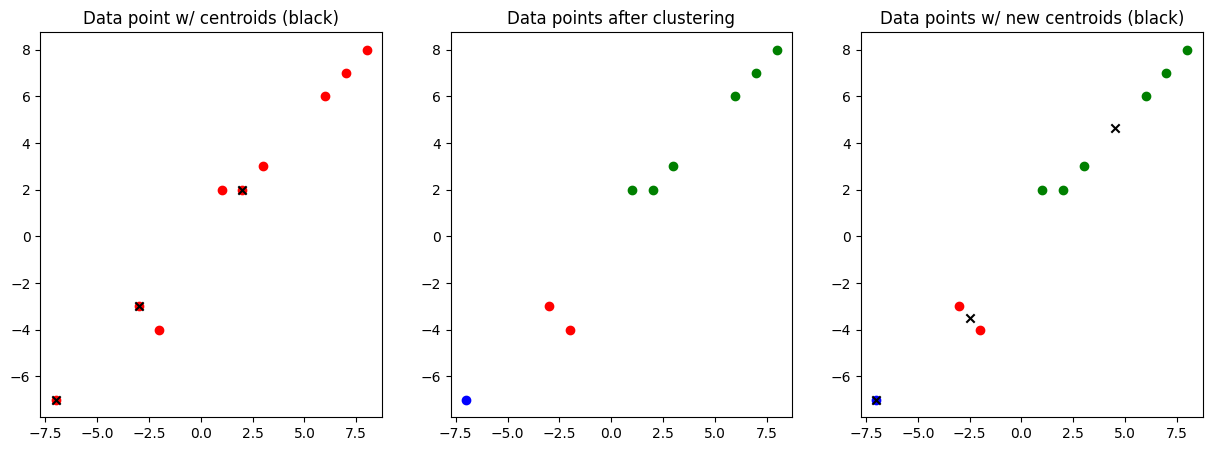

In [8]:
plot_im(data, centroids_T6, clustered_T6)

**T7**: What if we want to know how tight in each cluster are so that we can compare between two starting points!

In [9]:
# Make a function to calculate distance based on given clustered information

def in_cluster_dist(clustered_data):
    total_dist = 0
    for c in clustered_data:
        for d in clustered_data[c]:
            total_dist += euclidean_dist(d, c)
    return total_dist

In [10]:
T5_in_cluster_dist = in_cluster_dist(clustered_T5)
T6_in_cluster_dist = in_cluster_dist(clustered_T6)
print(f"Total in-cluster distance for T5: {T5_in_cluster_dist:.3f}")
print(f"Total in-cluster distance for T6: {T6_in_cluster_dist:.3f}")

Total in-cluster distance for T5: 13.270
Total in-cluster distance for T6: 21.972


**T8**: Let's come up with some great starting point by increase K=4

In [11]:
data = [(1, 2),
        (3, 3),
        (2, 2),
        (8, 8),
        (6, 6),
        (7, 7),
        (-3, -3),
        (-2, -4),
        (-7, -7)]

centroids_T7 = [(7, 7), (2, 2), (-1, -1), (-7, -7)]
clustered_T7 = kmeans(data, centroids_T7)

--------------------------------------------------
Initial centroids:  [(7, 7), (2, 2), (-1, -1), (-7, -7)]
--------------------------------------------------
Loop 1 starts --------------------------------------------------
Point (1, 2) is closest to centroid (2, 2) with distance 1.000
Point (3, 3) is closest to centroid (2, 2) with distance 1.414
Point (2, 2) is closest to centroid (2, 2) with distance 0.000
Point (8, 8) is closest to centroid (7, 7) with distance 1.414
Point (6, 6) is closest to centroid (7, 7) with distance 1.414
Point (7, 7) is closest to centroid (7, 7) with distance 0.000
Point (-3, -3) is closest to centroid (-1, -1) with distance 2.828
Point (-2, -4) is closest to centroid (-1, -1) with distance 3.162
Point (-7, -7) is closest to centroid (-7, -7) with distance 0.000

Cluster (7, 7) contains 3 points: [(8, 8), (6, 6), (7, 7)]
Cluster (2, 2) contains 3 points: [(1, 2), (3, 3), (2, 2)]
Cluster (-1, -1) contains 2 points: [(-3, -3), (-2, -4)]
Cluster (-7, -7) cont

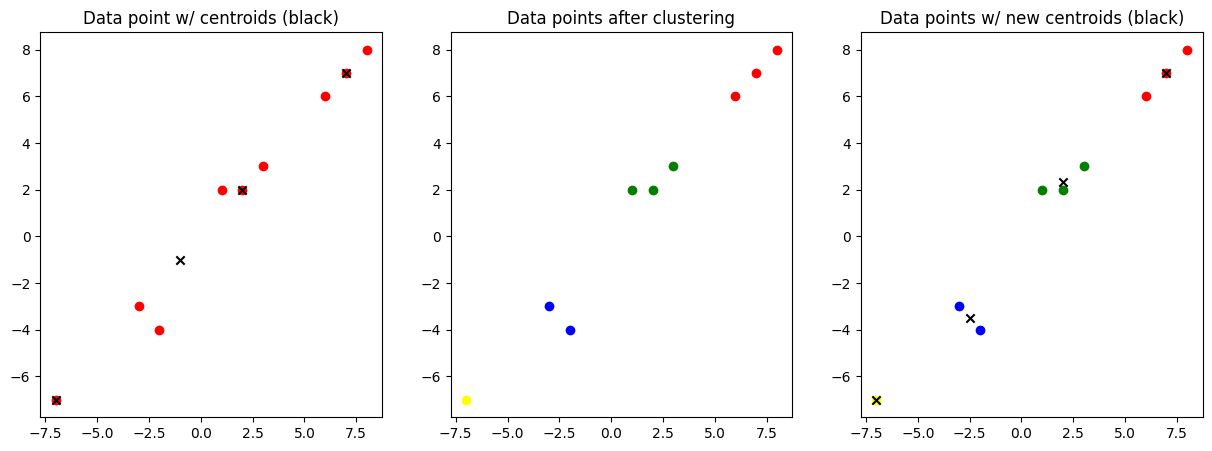

In [12]:
plot_im(data, centroids_T7, clustered_T7)

What will the distance in the clusters of this setting?

In [13]:
T7_in_cluster_dist = in_cluster_dist(clustered_T7)
print(f"Total in-cluster distance for T7: {T7_in_cluster_dist:.3f}")

Total in-cluster distance for T7: 6.832


### My heart will go on

**T8**: What is the median age of the training set?

I will start by import the important library for this task

In [14]:
import pandas as pd
import numpy as np
from copy import deepcopy

seed = 280222222
np.random.seed(seed)

Let's calculate the median age of the training set!

In [15]:
# Load the training data and display the first 5 rows
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_inspect = pd.read_csv(train_url) #training set
train_inspect.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(f"Before fill null; Median of age: {train_inspect['Age'].median()} Mode of age: {train_inspect['Age'].mode()[0]}")

# Fill the empty age cells with the median age
train_inspect["Age"] = train_inspect["Age"].fillna(train_inspect["Age"].mode()[0])

# Check the median of age
print(f"After fill null; Median of age: {train_inspect['Age'].median()} Mode of age: {train_inspect['Age'].mode()[0]}")

Before fill null; Median of age: 28.0 Mode of age: 24.0
After fill null; Median of age: 24.0 Mode of age: 24.0


**T9**: Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is
the mode of Embarked? Fill the missing values with the mode. (Do the same for Sex)

Let's define a function for cleaning the embarked and Sex column!

In [17]:
def categorize_embark(df):
    """Categorize the embark column

    Args:
        df (dataframe): The dataframe that contains all data

    Returns:
        df: categorized (embark) dataframe
    """
    df.loc[df["Embarked"] == "S", "Embarked"] = 0
    df.loc[df["Embarked"] == "C", "Embarked"] = 1
    df.loc[df["Embarked"] == "Q", "Embarked"] = 2
    return df

def categorize_sex(df):
    """Categorize sex column in to 1 and 0

    Args:
        df (dataframe): The dataframe that contains all data

    Returns:
        df: categorized dataframe
    """
    df.loc[df["Sex"] == "male", "Sex"] = 1
    df.loc[df["Sex"] == "female", "Sex"] = 0
    return df

Show the mode of the Embarked column!

In [18]:
# Clean the embark column
train_inspect = categorize_embark(train_inspect)
print(f"Before fill null with mode; Mode of embark: {train_inspect['Embarked'].mode()[0]}")

# Fill the empty embark cells with the mode of embark
train_inspect["Embarked"] = train_inspect["Embarked"].fillna(train_inspect["Embarked"].mode()[0])

# Check the mode of embark
print(f"After fill null with mode; Mode of embark: {train_inspect['Embarked'].mode()[0]}")

Before fill null with mode; Mode of embark: 0
After fill null with mode; Mode of embark: 0


Show the mode of Sex column!

In [19]:
# Clean the sex column
train_inspect = categorize_sex(train_inspect)
print(f"Before fill null with mode; Mode of sex: {train_inspect['Sex'].mode()[0]}")

# Fill the empty Sex cells with mode
train_inspect["Sex"] = train_inspect["Sex"].fillna(train_inspect["Sex"].mode()[0])

# Check the mode of sex
print(f"After fill null with mode; Mode of sex: {train_inspect['Sex'].mode()[0]}")

Before fill null with mode; Mode of sex: 1
After fill null with mode; Mode of sex: 1


**T10**: Write a logistic regression classifier using gradient descent as learned
in class. Use PClass, Sex, Age, and Embarked as input features.

Let's make the model for logistic regression!

In [20]:
# Implement the logistic regression classifier
class LogisticRegClassifier:
    def __init__(self, learning_rate=0.01, epoch=1000, n_attributes=4, batch_size=32, val_perc=0.1):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.n_attributes = n_attributes
        self.batch_size = batch_size
        self.xy = None
        self.val_perc = val_perc
        self.weights = self.initialize()
    
    def setup_train_data(self, xy):
        """Setup training data for the model

        Args:
            xy (array):training data x and y
        """
        self.xy = xy
        
    
    def initialize(self,):
        """
        Initialize the model's weights according to the number of attributes
        Ex: z = w0+ w1x1 + w2x2 + w3x3 + w4x4 (like in the lecture)
        """
        weights = np.random.randn(self.n_attributes + 1, 1)
        return weights

    def sigmoid(self, x):
        """
        Sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    def forward(self, x, is_train=True):
        """
        Forward pass for the model using dot product
        """
        
        # Forward to get the intermediate output
        z = self.weights[0] + np.dot(x, self.weights[1:])
        
        
        # Apply logistic function
        output = self.sigmoid(z)
        return output
    
    def inference(self, x):
        """
        Inference the model
        """
        out = self.forward(x, is_train=False)
        out_class = np.array([1 if i > 0.5 else 0 for i in out]).reshape(-1, 1)
        return out_class

    
    def calculate_loss(self, y, y_pred, eps=1e-8):
        """
        Calculate the loss
        """
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
    
    def backward(self, x, y, y_pred):
        """
        Backward pass for the model
        """
        # Calculate the gradient
        dz = y - y_pred
        
        # Update the weights
        self.weights[1:] += self.learning_rate * np.dot(x.T, dz)
        self.weights[0] += self.learning_rate * np.sum(dz)
        
    
    def calculuate_accuracy(self, y, y_pred):
        """
        Calculate the accuracy of the model
        """
        y_pred_class = np.array([1.0 if i > 0.5 else 0.0 for i in y_pred]).reshape(-1, 1) # Need to have the same shape as y
        y_result = y_pred_class == y
        return np.mean(y_result)
    
    def train_without_val(self,):
        print('----------------------------------------------------')
        print("Starting train.....")
        print('----------------------------------------------------')
        for i in range(self.epoch):
            # Make a batch
            n_batch = len(self.xy) // self.batch_size
            
            # Shuffle the data before batching because when batch the last batch might not be full so it will be dropped out!
            np.random.shuffle(self.xy)
            
            # Split the training data
            x_train, y_train = self.xy[:, :-1], self.xy[:, -1].reshape(-1, 1)
            
            for j in range(n_batch):
                x_batch = x_train[j * self.batch_size: (j + 1) * self.batch_size]
                y_batch = y_train[j * self.batch_size: (j + 1) * self.batch_size]
                
                # Forward pass
                y_pred = self.forward(x_batch)
                
                # Calculate the loss
                loss = self.calculate_loss(y_batch, y_pred)
                
                # Backward pass
                self.backward(x_batch, y_batch, y_pred)
                
            # Log
            if (i+1) == self.epoch:
                print(f"Epoch: {i+1}, Loss: {loss:.5f}, Accuracy: {self.calculuate_accuracy(y_train, self.forward(x_train))}")
    
    def train(self, val_perc=0.1):
        """
        Train the model with val
        """
        
        # Prepare dataset: split and batch
        total_size = self.xy.shape[0]

        # Shuffle the data
        np.random.shuffle(self.xy)
        
        # Split the data
        val_size = int(total_size * val_perc)
        xy_train = self.xy[val_size:, :]
        x_val, y_val = self.xy[:val_size, :-1], self.xy[:val_size, -1].reshape(-1, 1)
        
        
        print(f"Train size: {len(xy_train)} Validation size: {len(x_val)} ({0.1*100:.0f}% of data) Total size: {total_size}")
        
        # Check the size if we add it should equal to the total size
        assert len(xy_train) + len(x_val) == total_size, "The size of the train and validation data should equal to the total size"
        
        print('----------------------------------------------------')
        print("Starting train.....")
        print('----------------------------------------------------')
        for i in range(self.epoch):
            # Make a batch
            n_batch = len(xy_train) // self.batch_size
            
            # Shuffle the data before batching because when batch the last batch might not be full so it will be dropped out!
            np.random.shuffle(xy_train)
            
            # Split the training data
            x_train, y_train = xy_train[:, :-1], xy_train[:, -1].reshape(-1, 1)
            
            for j in range(n_batch):
                x_batch = x_train[j * self.batch_size: (j + 1) * self.batch_size]
                y_batch = y_train[j * self.batch_size: (j + 1) * self.batch_size]
                
                # Forward pass
                y_pred = self.forward(x_batch)
                
                # Calculate the loss
                loss = self.calculate_loss(y_batch, y_pred)
                
                # Backward pass
                self.backward(x_batch, y_batch, y_pred)
                
            # Log
            if (i+1) % 10 == 0:
                print(f"Epoch: {i+1}, Loss: {loss:.5f}, Accuracy: {self.calculuate_accuracy(y_val, self.forward(x_val))}")

Make function to clean all column that needed to be cleaned! and also the function for normalize and setup the data before training!! More than that I will predefine the inference function for testing and export the result as a csv file.

In [21]:
def clean_data(df, columns=["Age", "Embarked", "Sex",]):
    for column in columns:
        if column == "Age":
            # Fill null value with mode as default
            df[column] = df[column].fillna(df[column].mode()[0])
        elif column == "Embarked":
            # Fill null value with mode as default
            df = categorize_embark(df)
            df[column] = df[column].fillna(df[column].mode()[0])
        elif column == "Sex":
            df = categorize_sex(df)
    
    return df

def _normalize_minmax(data, eps=1e-8):
    """Normalize each column of the data

    Args:
        data (array): The array that contains all data

    Returns:
        array: normalized data
    """
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0) + eps), data.min(axis=0), data.max(axis=0)

def normalize(x, min=None, max=None, eps=1e-8):
        """
        Normalize the data for test set
        """
        return (x - min) / (max - min + eps)

def setup_train_data(xy, attr_to_normalize):
    """Setup training data for the model

    Args:
        xy (array):training data x and y(optional)
    """
    xy = xy
    attr_normalize_stats = {}
    
    # Normalize according to the attributes
    for i in attr_to_normalize:
        xy[:, i], min, max = _normalize_minmax(xy[:, i])
        print(f"Attribute {i} min: {min}, max: {max}")
        
        # Save the min and max for each attribute to stats
        attr_normalize_stats[i] = [min, max]
    
    print(attr_normalize_stats)
    print('----------------------------------------------------')
    
    return xy, attr_normalize_stats

def inference(test, classifier):
    # Load the test data 
    test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
    test_df = pd.read_csv(test_url) #test set
    
    # Inference the model
    result = classifier.inference(test)
    
    # Concat the result with DataFrame
    test_df["Survived"] = result.astype(np.int64)
    
    # Return dataframe with only PassengerId and Survived
    return test_df[["PassengerId", "Survived"]]

Load data and prepare the recipe for cooking!

In [22]:
# Load the training data
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url) #training set
train_df = clean_data(train_df)

# Load the test data
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_df = pd.read_csv(test_url) #test set
test_df = clean_data(test_df)

In [23]:
# Gather trainset for each experiment

# Common trainset for T10 and T12
trainset_00 = np.array(train_df[["Pclass","Sex","Age","Embarked", "Survived"]].values, dtype=float)

# T10 (Original)
trainset_01 = deepcopy(trainset_00)
trainset_01, trainset_01_stats = setup_train_data(trainset_01, [2,]) # Normalize only age

# T12 (High order)
trainset_02 = deepcopy(trainset_00)
trainset_02, trainset_02_stats = setup_train_data(trainset_02, [2,]) # Normalize only age
trainset_02 = np.concatenate((trainset_02[:, 0:1]**2, trainset_02[:, 2:3]**2, trainset_02[:, 1:2] * trainset_02[:, 2:3], trainset_02), axis=1)

# Common trainset for T13.1 and T13.2
trainset_00_03 = np.array(train_df[["Sex", "Age", "Survived"]].values, dtype=float)

# T13.1 (Just only sex and age)
trainset_03 = deepcopy(trainset_00_03)
trainset_03, trainset_03_stats = setup_train_data(trainset_03, [1,]) # Normalize only age

# T13.2 (High order for sex and age for experiment!!!)
trainset_04 = deepcopy(trainset_00_03)
trainset_04, trainset_04_stats = setup_train_data(trainset_04, [1,]) # Normalize only age
trainset_04 = np.concatenate((trainset_04[:, 0:1]**2, trainset_04), axis=1)

Attribute 2 min: 0.42, max: 80.0
{2: [0.42, 80.0]}
----------------------------------------------------
Attribute 2 min: 0.42, max: 80.0
{2: [0.42, 80.0]}
----------------------------------------------------
Attribute 1 min: 0.42, max: 80.0
{1: [0.42, 80.0]}
----------------------------------------------------
Attribute 1 min: 0.42, max: 80.0
{1: [0.42, 80.0]}
----------------------------------------------------


In [24]:
# Gather testset for each experiment

# Common testset
testset_00 = np.array(test_df[["Pclass","Sex","Age","Embarked"]].values, dtype=float)
testset_00[:, 2] = normalize(testset_00[:, 2], trainset_01_stats[2][0], trainset_01_stats[2][1])

# T10
testset_01 = deepcopy(testset_00)

# T12
testset_02 = deepcopy(testset_00)
testset_02 = np.concatenate((testset_02[:, 0:1]**2, testset_02[:, 2:3]**2, testset_02[:, 1:2] * testset_02[:, 2:3], testset_02), axis=1)

# T13.1
testset_00_03 = deepcopy(testset_00)
testset_00_03 = np.delete(testset_00_03, [0, 3], axis=1) # Common testset 00 03
testset_03 = deepcopy(testset_00_03)

# T13.2
testset_04 = deepcopy(testset_00_03)
testset_04 = np.concatenate((testset_04[:, 0:1]**2,  testset_04), axis=1)

This is my base config for training this model which has the following parameters:
- Learning rate = 0.01
- Number of iterations = 100
- Batch size = 64

In [25]:
# Base config
lr = 0.01
epoch = 100
batch_size = 64

Define the classifier for each question

In [26]:
# Base config
lr = 0.01
epoch = 100
batch_size = 64

classifier01 = LogisticRegClassifier(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=4,)
classifier01.setup_train_data(trainset_01)


classifier02 = LogisticRegClassifier(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=7,)
classifier02.setup_train_data(trainset_02)


classifier03 = LogisticRegClassifier(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=2,)
classifier03.setup_train_data(trainset_03)


classifier04 = LogisticRegClassifier(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=3,)
classifier04.setup_train_data(trainset_04)

Let's cook the **T10**

In [27]:
# Train the model for T10
classifier01.train_without_val()

# Test the model for T10
final_result_01 = inference(testset_01, classifier01)

# Save as csv
final_result_01.to_csv(f"./titanic_result_01_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: 0.39413, Accuracy: 0.7822671156004489


**T12**: Try adding some higher order features to your training (x21 , x1 x2 ,...).
Does this model has better accuracy on the training set? How does it
perform on the test set?

In [28]:
# Train the model for T12
classifier02.train_without_val()

# Test the model for T12
final_result_02 = inference(testset_02, classifier02)

# Save as csv
final_result_02.to_csv(f"./titanic_result_02_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: 0.65992, Accuracy: 0.7934904601571269


**T13**: What happens if you reduce the amount of features to just Sex and Age?

In [29]:
# Train the model for T13.1
classifier03.train_without_val()

# Test the model for T13.1
final_result_03 = inference(testset_03, classifier03)

# Save as csv
final_result_03.to_csv(f"./titanic_result_03_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: 0.56076, Accuracy: 0.7867564534231201


**T13.1**: What if I add high order feats?

In [30]:
# Train the model for T13.2
classifier04.train_without_val()

# Test the model for T13.2
final_result_04 = inference(testset_04, classifier04)

# Save as csv
final_result_04.to_csv(f"./titanic_result_04_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: 0.50062, Accuracy: 0.7867564534231201


**OT3**: We want to show that matrix inversion yields the same answer
as the gradient descent method. However, there is no closed form solution for
logistic regression. Thus, we will use normal linear regression instead. Re-do
the Titanic task as a regression problem by using linear regression. Use the
gradient descent method.

Let's define the class linear regression! with no bias term which is simpler when compare with matrix inversion method

In [ ]:
class LinearReg(LogisticRegClassifier):
    def __init__(self, learning_rate=0.01, epoch=1000, n_attributes=4, batch_size=32, val_perc=0.1):
        super().__init__(learning_rate, epoch, n_attributes, batch_size, val_perc)
    
    def initialize(self,):
        """
        Initialize the model's weights according to the number of attributes
        Ex: z = w0+ w1x1 + w2x2 + w3x3 + w4x4 (like in the lecture)
        """
        weights = np.random.randn(self.n_attributes, 1)
        return weights
    
    def backward(self, x, y, y_pred):
        """
        Backward pass for the model
        """
        # Calculate the gradient
        dz = y - y_pred
        
        # Update the weights
        self.weights += self.learning_rate * np.dot(x.T, dz)
    
    def forward(self, x, is_train=True):
        """
        Forward pass for the model using dot product
        """
        
        # Forward to get the intermediate output
        # z = self.weights[0] + np.dot(x, self.weights[1:])
        z = np.dot(x, self.weights)
        
        return z
    
    def calculate_loss(self, y, y_pred, eps=1e-8):
        """
        Calculate the loss
        """
        return np.mean((y - y_pred)**2)

Define the training and testset

In [ ]:
# Gather trainset for each experiment
# Common trainset for T10 and T12
trainset_00 = np.array(train_df[["Pclass","Sex","Age","Embarked", "Survived"]].values, dtype=float)

# T10 (Original)
trainset_01 = deepcopy(trainset_00)
trainset_01, trainset_01_stats = setup_train_data(trainset_01, [2,]) # Normalize only age


# Gather testset for each experiment
# Common testset
testset_00 = np.array(test_df[["Pclass","Sex","Age","Embarked"]].values, dtype=float)
testset_00[:, 2] = normalize(testset_00[:, 2], trainset_01_stats[2][0], trainset_01_stats[2][1])

# T10
testset_01 = deepcopy(testset_00)

Attribute 2 min: 0.42, max: 80.0
{2: [0.42, 80.0]}
----------------------------------------------------


Make a model instance

Let's do two experiments with different Learning rate

In [ ]:
# Base config1
lr = 0.01
epoch = 100
batch_size = 64

linearreg1 = LinearReg(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=4,)
linearreg1.setup_train_data(trainset_01)

# Base config2
lr = 0.001
epoch = 100
batch_size = 64

linearreg2 = LinearReg(learning_rate=lr, epoch=epoch, batch_size=batch_size,
                                     n_attributes=4,)
linearreg2.setup_train_data(trainset_01)

It looks like the model with default learning rate that I use for Logistic regression is not working well for linear regression which give the overflow in square warning. I will try to use the learning rate of 0.001

In [ ]:
# Train the model for T10
linearreg1.train_without_val()

# Test the model for T10
linearreg1_result = inference(testset_01, linearreg1)

# Save as csv
linearreg1_result.to_csv(f"./linearreg_titanic_result_1_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: nan, Accuracy: 0.6161616161616161


/home/phonphrm/miniconda3/envs/pattern_class/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_158688/3761011842.py:38: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred)**2)


This model looks pretty great! Let's see the result of the test set! in Kaggle

In [ ]:
# Train the model for T10
linearreg2.train_without_val()

# Test the model for T10
linearreg2_result = inference(testset_01, linearreg2)

# Save as csv
linearreg2_result.to_csv(f"./linearreg_titanic_result_2_seed{seed}.csv", index=False)

----------------------------------------------------
Starting train.....
----------------------------------------------------
Epoch: 100, Loss: 0.19649, Accuracy: 0.6924803591470258


**OT4**: Now try using matrix inversion instead. However Are the weights
learned from the two methods similar? Report the Mean Squared Errors (MSE)
of the difference between the two weights.

In [ ]:
# Gather trainset for each experiment
# Common trainset for T10 and T12
trainset_00 = np.array(train_df[["Pclass","Sex","Age","Embarked", "Survived"]].values, dtype=float)

# T10 (Original)
trainset_01 = deepcopy(trainset_00)
trainset_01, trainset_01_stats = setup_train_data(trainset_01, [2,]) # Normalize only age

Attribute 2 min: 0.42, max: 80.0
{2: [0.42, 80.0]}
----------------------------------------------------


Let's define the variable for the matrix inversion and do the calculation!

In [ ]:
X = trainset_01[:, :-1]
X_T = X.T
y = trainset_01[:, -1].reshape(-1, 1)

weights_matrix_inversion = np.linalg.inv(X_T @ X) @ X_T @ y
print(f"Weights size for the matix inversion method: {weights_matrix_inversion.shape}")

Weights size for the matix inversion method: (4, 1)


Compare two weights from two methods!
- Get weight from Linear Regression with Gradient Descent method with no bias weight

In [ ]:
weights_grad_descent = linearreg2.weights
print(f"Weights size for the gradient descent method: {weights_grad_descent.shape}")

weight_diff = np.mean((weights_matrix_inversion - weights_grad_descent)**2)
print(f"MSE between the matrix inversion and gradient descent method: {weight_diff:.6f}")

Weights size for the gradient descent method: (4, 1)
MSE between the matrix inversion and gradient descent method: 0.000262
